In [2]:
!pip install gdown

In [3]:
!gdown 1fqrqZyVxawsd79hAwIZbRMiqPIP-td-K

Downloading...
From: https://drive.google.com/uc?id=1fqrqZyVxawsd79hAwIZbRMiqPIP-td-K
To: /content/Copy of FruitinAmazon.zip
100% 1.24M/1.24M [00:00<00:00, 59.3MB/s]


In [4]:
!unzip "/content/Copy of FruitinAmazon.zip"


Archive:  /content/Copy of FruitinAmazon.zip
  inflating: FruitinAmazon/test/cupuacu/download (5).jpeg  
  inflating: FruitinAmazon/test/acai/images (2).jpeg  
  inflating: FruitinAmazon/test/cupuacu/download (3).jpeg  
  inflating: FruitinAmazon/test/acai/images (16).jpeg  
  inflating: FruitinAmazon/test/pupunha/download (2).jpeg  
  inflating: FruitinAmazon/train/pupunha/images (1).jpeg  
  inflating: FruitinAmazon/test/cupuacu/download (2).jpeg  
  inflating: FruitinAmazon/test/pupunha/download (1).jpeg  
  inflating: FruitinAmazon/train/acai/images (3).jpeg  
  inflating: FruitinAmazon/train/acai/images (4).jpeg  
  inflating: FruitinAmazon/test/graviola/download (1).jpeg  
  inflating: FruitinAmazon/test/pupunha/download (11).jpeg  
  inflating: FruitinAmazon/test/pupunha/download (4).jpeg  
  inflating: FruitinAmazon/train/acai/images (11).jpeg  
  inflating: FruitinAmazon/test/tucuma/download (1).jpeg  
  inflating: FruitinAmazon/test/acai/images.jpeg  
  inflating: FruitinAmaz

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
# Load a sample dataset (MNIST for simplicity)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# Normalize and reshape data
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = np.expand_dims(x_train, axis=-1) # Add channel dimension
x_test = np.expand_dims(x_test, axis=-1)
# Define a simple CNN model
model = keras.Sequential([
layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, (3, 3), activation="relu"),
layers.MaxPooling2D((2, 2)),
layers.Flatten(),
layers.Dense(128, activation="relu"),
layers.Dense(10, activation="softmax") # 10 classes for MNIST digits
])
# Compile the model
model.compile(optimizer="adam",

loss="sparse_categorical_crossentropy",
metrics=["accuracy"])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")
# Make predictions
predictions = model.predict(x_test[:5])
predicted_labels = np.argmax(predictions, axis=1)
print("Predicted labels:", predicted_labels)
print("Actual labels: ", y_test[:5])

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 30ms/step - accuracy: 0.9156 - loss: 0.2851 - val_accuracy: 0.9855 - val_loss: 0.0450
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 29ms/step - accuracy: 0.9859 - loss: 0.0471 - val_accuracy: 0.9899 - val_loss: 0.0361
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.9909 - loss: 0.0278 - val_accuracy: 0.9879 - val_loss: 0.0392
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9936 - loss: 0.0202 - val_accuracy: 0.9896 - val_loss: 0.0318
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 29ms/step - accuracy: 0.9944 - loss: 0.0154 - val_accuracy: 0.9901 - val_loss: 0.0317
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9869 - loss: 0.0429
Test accuracy: 0.9901
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Predicted labels: [7 2 1 0 4]
Actual labels:  [7 2 1 0 4]


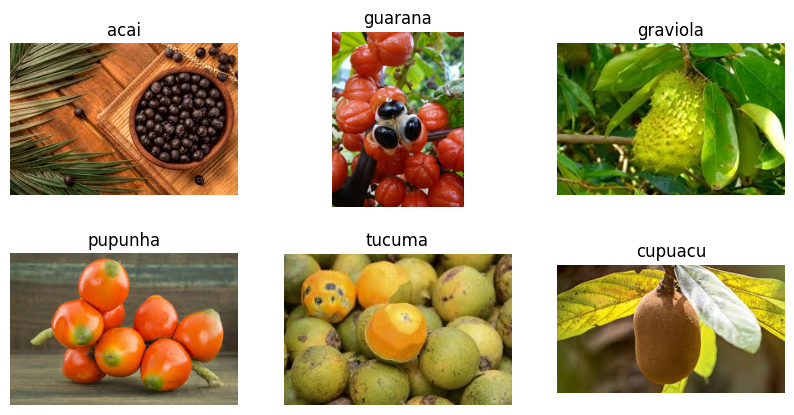

In [6]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

def load_and_visualize_images(train_dir):
    class_directories = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]
    images = []
    labels = []

    for class_dir in class_directories:
        class_path = os.path.join(train_dir, class_dir)
        image_files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
        random_image = random.choice(image_files)
        image_path = os.path.join(class_path, random_image)
        images.append(Image.open(image_path))
        labels.append(class_dir)

    plt.figure(figsize=(10, 5))
    for i in range(len(images)):
        plt.subplot(2, (len(images) + 1) // 2, i + 1)
        plt.imshow(images[i])
        plt.title(labels[i])
        plt.axis('off')
    plt.show()

# Example usage
train_dir = 'FruitinAmazon/train'
load_and_visualize_images(train_dir)


In [7]:
def check_corrupted_images(train_dir):
    corrupted_images = []
    for class_dir in os.listdir(train_dir):
        class_path = os.path.join(train_dir, class_dir)
        if os.path.isdir(class_path):
            for image_file in os.listdir(class_path):
                image_path = os.path.join(class_path, image_file)
                try:
                    img = Image.open(image_path)
                    img.verify()  # Verifies if it is an image
                except (IOError, SyntaxError) as e:
                    print(f"Removed corrupted image: {image_path}")
                    corrupted_images.append(image_path)
                    os.remove(image_path)
    if not corrupted_images:
        print("No corrupted images found.")

# Example usage
check_corrupted_images(train_dir)


No corrupted images found.


In [8]:
import tensorflow as tf

def load_and_preprocess_data(train_dir, img_height, img_width, batch_size, validation_split):
    rescale = tf.keras.layers.Rescaling(1./255)

    train_ds = tf.keras.preprocessing.image_dataset_from_directory(
        train_dir,
        labels='inferred',
        label_mode='int',
        image_size=(img_height, img_width),
        interpolation='nearest',
        batch_size=batch_size,
        shuffle=True,
        validation_split=validation_split,
        subset='training',
        seed=123
    )

    train_ds = train_ds.map(lambda x, y: (rescale(x), y))

    val_ds = tf.keras.preprocessing.image_dataset_from_directory(
        train_dir,
        labels='inferred',
        label_mode='int',
        image_size=(img_height, img_width),
        interpolation='nearest',
        batch_size=batch_size,
        shuffle=False,
        validation_split=validation_split,
        subset='validation',
        seed=123
    )

    val_ds = val_ds.map(lambda x, y: (rescale(x), y))

    return train_ds, val_ds

# Example usage
img_height = 128
img_width = 128
batch_size = 32
validation_split = 0.2
train_ds, val_ds = load_and_preprocess_data(train_dir, img_height, img_width, batch_size, validation_split)


Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.


In [9]:
from tensorflow.keras import layers, models

def create_cnn_model(num_classes, input_shape):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Example usage
num_classes = len(os.listdir(train_dir))  # Adjust based on your dataset
input_shape = (img_height, img_width, 3)
model = create_cnn_model(num_classes, input_shape)


In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [11]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

callbacks = [
    ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss'),
    EarlyStopping(patience=10, restore_best_weights=True)
]

history = model.fit(train_ds, epochs=250, validation_data=val_ds, callbacks=callbacks)


Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step - accuracy: 0.1296 - loss: 3.1058

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 597ms/step - accuracy: 0.1319 - loss: 3.2527 - val_accuracy: 0.2778 - val_loss: 1.3103
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 476ms/step - accuracy: 0.2027 - loss: 1.9529 - val_accuracy: 0.3333 - val_loss: 1.5784
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 691ms/step - accuracy: 0.2986 - loss: 1.6492

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 984ms/step - accuracy: 0.3073 - loss: 1.6421 - val_accuracy: 0.8333 - val_loss: 1.2234
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step - accuracy: 0.4497 - loss: 1.5167

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 534ms/step - accuracy: 0.4518 - loss: 1.5082 - val_accuracy: 0.8333 - val_loss: 0.9779
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 454ms/step - accuracy: 0.5582 - loss: 1.2178 - val_accuracy: 0.6667 - val_loss: 1.1744
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step - accuracy: 0.6244 - loss: 0.9874

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 551ms/step - accuracy: 0.6280 - loss: 0.9774 - val_accuracy: 0.6667 - val_loss: 0.9016
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step - accuracy: 0.7899 - loss: 0.6136

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 516ms/step - accuracy: 0.7904 - loss: 0.6174 - val_accuracy: 0.7778 - val_loss: 0.7857
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step - accuracy: 0.9005 - loss: 0.4546

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 558ms/step - accuracy: 0.8976 - loss: 0.4554 - val_accuracy: 0.8889 - val_loss: 0.4390
Epoch 9/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 848ms/step - accuracy: 0.9596 - loss: 0.2544 - val_accuracy: 0.8333 - val_loss: 0.4717
Epoch 10/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 749ms/step - accuracy: 0.9596 - loss: 0.1740 - val_accuracy: 0.8333 - val_loss: 0.4601
Epoch 11/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 0.9902 - loss: 0.0984

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 536ms/step - accuracy: 0.9891 - loss: 0.0965 - val_accuracy: 0.8333 - val_loss: 0.3174
Epoch 12/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 469ms/step - accuracy: 1.0000 - loss: 0.0460 - val_accuracy: 0.8889 - val_loss: 0.3432
Epoch 13/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 504ms/step - accuracy: 1.0000 - loss: 0.0370 - val_accuracy: 0.8333 - val_loss: 0.4048
Epoch 14/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 807ms/step - accuracy: 1.0000 - loss: 0.0126 - val_accuracy: 0.8333 - val_loss: 0.4380
Epoch 15/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 509ms/step - accuracy: 1.0000 - loss: 0.0091 - val_accuracy: 0.8333 - val_loss: 0.3800
Epoch 16/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step - accuracy: 1.0000 - loss: 0.0053

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 557ms/step - accuracy: 1.0000 - loss: 0.0051 - val_accuracy: 0.8333 - val_loss: 0.2716
Epoch 17/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step - accuracy: 1.0000 - loss: 0.0043

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 531ms/step - accuracy: 1.0000 - loss: 0.0043 - val_accuracy: 0.8333 - val_loss: 0.2094
Epoch 18/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step - accuracy: 1.0000 - loss: 0.0021

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 621ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 0.8333 - val_loss: 0.2031
Epoch 19/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 684ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 0.8889 - val_loss: 0.2135
Epoch 20/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 439ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.8333 - val_loss: 0.2250
Epoch 21/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 477ms/step - accuracy: 1.0000 - loss: 8.5926e-04 - val_accuracy: 0.8333 - val_loss: 0.2340
Epoch 22/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 439ms/step - accuracy: 1.0000 - loss: 7.0859e-04 - val_accuracy: 0.8333 - val_loss: 0.2456
Epoch 23/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 455ms/step - accuracy: 1.0000 - loss: 5.7939e-04 - val_accuracy: 0.8333 - val_loss: 0.2616
Epoch 24/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 457ms/step - accuracy: 1.0000 - loss: 5.8402e-04 - val_accuracy: 0.8333 - val_loss: 0.2898
Epoch 25/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 807ms/step - accuracy: 1.0000 - loss: 4.9990e-04 - val_accur

In [12]:
import tensorflow as tf

# Define the rescale layer
rescale = tf.keras.layers.Rescaling(1./255)

# Load and preprocess the test dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'FruitinAmazon/test',
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False
)

# Apply the normalization (Rescaling) to the test dataset
test_ds = test_ds.map(lambda x, y: (rescale(x), y))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test accuracy: {test_acc:.4f}")


Found 30 files belonging to 6 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step - accuracy: 0.7667 - loss: 0.6927
Test accuracy: 0.7667


In [13]:
model.save('final_model.h5')

# Load the model
loaded_model = tf.keras.models.load_model('final_model.h5')

# Re-evaluate the model
test_loss, test_acc = loaded_model.evaluate(test_ds)
print(f"Test accuracy after loading: {test_acc:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step - accuracy: 0.7667 - loss: 0.6927
Test accuracy after loading: 0.7667


In [14]:
import numpy as np
from sklearn.metrics import classification_report

predictions = model.predict(test_ds)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.concatenate([y for x, y in test_ds], axis=0)

print(classification_report(true_labels, predicted_labels, target_names=os.listdir(train_dir)))



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step
              precision    recall  f1-score   support

        acai       0.67      0.80      0.73         5
     guarana       0.75      0.60      0.67         5
    graviola       0.62      1.00      0.77         5
     pupunha       0.83      1.00      0.91         5
      tucuma       1.00      0.80      0.89         5
     cupuacu       1.00      0.40      0.57         5

    accuracy                           0.77        30
   macro avg       0.81      0.77      0.76        30
weighted avg       0.81      0.77      0.76        30



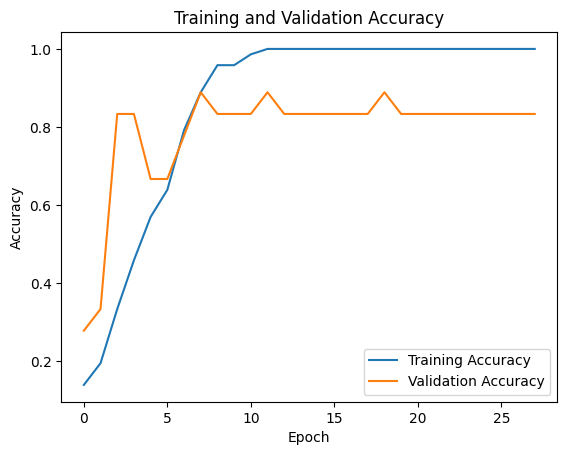

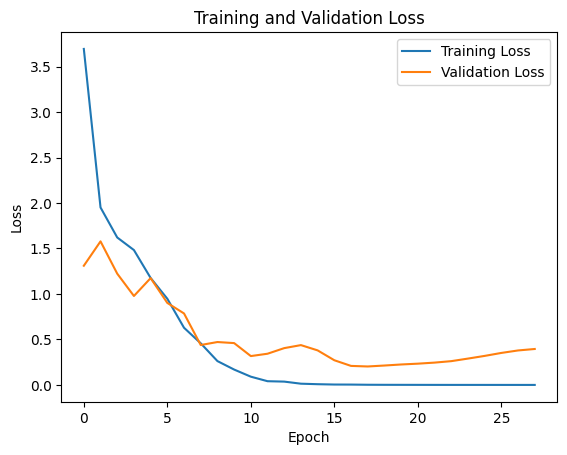

In [15]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()